In [1]:
import sys
sys.path.insert(0, "/home/piotr/git/rainflow")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

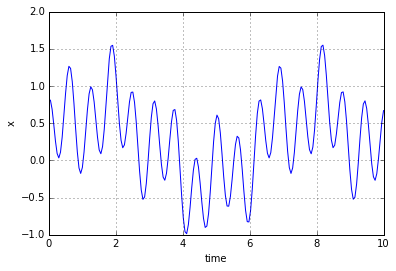

In [36]:
t = np.linspace(0, 10, 200)
x = 0.2 + 0.5 * np.sin(t) + 0.6 * np.cos(10*t) + 0.3 * np.sin(4*t)
plt.plot(t, x)
plt.xlabel("time")
plt.ylabel("x");

In [70]:
import rainflow
print rainflow.extract_cycles(x)

[1.4379996149035443, 0.93995296970297992, 2.3733770852593192, 2.0702396380515622, 1.6690487716579188, 1.4398479776979027, 1.4357781676657204, 1.0681663638715169, 1.0660652405678441, 0.9364632733205005]


indices = [ 12  19  38  56  63  69  75  82  88  93 100 107 112 119 137 144 163 181
 188 194 199]


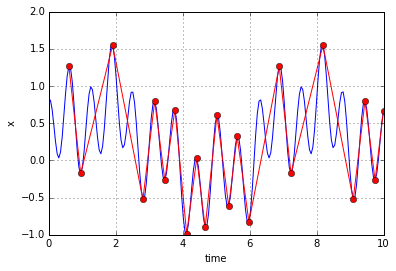

In [37]:
indices = rainflow.local_extrema(x)
print "indices =", indices

plt.plot(t, x)
plt.plot(t[indices], x[indices], "-ro")
plt.xlabel("time")
plt.ylabel("x");

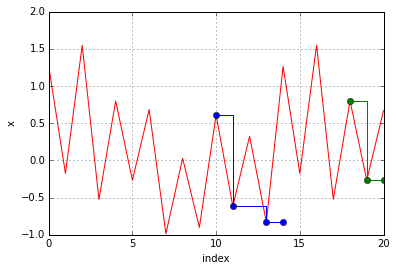

In [51]:
a = x[indices]
hc1 = rainflow.HalfCycle(a, 10)
hc2 = rainflow.HalfCycle(a, 18)

plt.plot(a, color="red")
plt.step(hc1.index, hc1.values, "-o", where="post", color="blue")
plt.step(hc2.index, hc2.values, "-o", where="post", color="green")
plt.xlabel("index")
plt.ylabel("x");

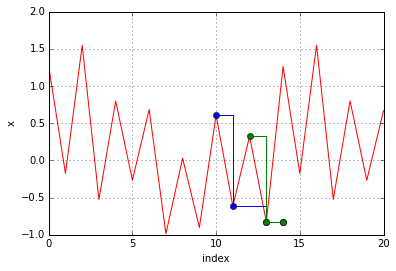

In [50]:
hc1 = rainflow.HalfCycle(a, 10)
hc2 = rainflow.HalfCycle(a, 12)

plt.plot(a, color="red")
plt.step(hc1.index, hc1.values, "-o", where="post", color="blue")
plt.step(hc2.index, hc2.values, "-o", where="post", color="green")
plt.xlabel("index")
plt.ylabel("x");

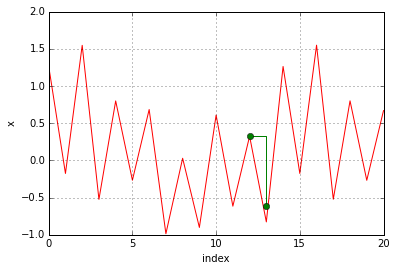

In [49]:
hc2.clip(hc1)

plt.plot(a, "r")
plt.step(hc2.index, hc2.values, "-o", where="post", color="green")
plt.xlabel("index")
plt.ylabel("x");

In [74]:
halfcycles = rainflow.extract_halfcycles(a)
print "halfcycles:\n{}".format(halfcycles)

halfcycles:
[1.4398479776979027, 2.0702396380515622, 1.0660652405678441, 1.6690487716579188, 0.92986695771532291, 1.4357781676657204, 0.93995296970297992, 1.4379996149035443, 2.0707610143837645, 1.0681663638715169, -1.7243443518777555, -1.3230492768722524, -0.95055496009073437, -1.0138900155504835, -1.5101274378855787, -0.93995296970297992, -2.3733770852593192, -1.4379996149035443, -1.3224676251330911, -0.9364632733205005]


In [63]:
full, residual = rainflow.combine_halfcycles(halfcycles)
print "full:\n{}\n".format(full)
print "residual:\n{}".format(sorted(residual))

full:
[1.4379996149035443, 0.93995296970297992]

residual:
[-2.3733770852593192, -1.7243443518777555, -1.5101274378855787, -1.3230492768722524, -1.3224676251330911, -1.0138900155504835, -0.95055496009073437, -0.9364632733205005, 0.92986695771532291, 1.0660652405678441, 1.0681663638715169, 1.4357781676657204, 1.4398479776979027, 1.6690487716579188, 2.0702396380515622, 2.0707610143837645]


In [66]:
from itertools import izip_longest
negative = sorted((r for r in residual if r < 0), reverse=False)
positive = sorted((r for r in residual if r > 0), reverse=True)
np.column_stack((negative, positive))

array([[-2.37337709,  2.07076101],
       [-1.72434435,  2.07023964],
       [-1.51012744,  1.66904877],
       [-1.32304928,  1.43984798],
       [-1.32246763,  1.43577817],
       [-1.01389002,  1.06816636],
       [-0.95055496,  1.06606524],
       [-0.93646327,  0.92986696]])

In [71]:
converted = rainflow.convert_residual_halfcycles(residual)
print "converted:\n{}".format(converted)

converted:
[2.3733770852593192, 2.0702396380515622, 1.6690487716579188, 1.4398479776979027, 1.4357781676657204, 1.0681663638715169, 1.0660652405678441, 0.9364632733205005]


In [73]:
cycles = full + converted
print "cycles:\n{}".format(cycles)

cycles:
[1.4379996149035443, 0.93995296970297992, 2.3733770852593192, 2.0702396380515622, 1.6690487716579188, 1.4398479776979027, 1.4357781676657204, 1.0681663638715169, 1.0660652405678441, 0.9364632733205005]
